In [45]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
from fiona.crs import from_epsg
import os
import math
pd.set_option('max_columns',100)
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [46]:
df = pd.read_csv("joined.csv")

In [47]:
df.head()

,Unnamed: 0,ID,Date,Days,Borough,Latitude,Longitude,Zip,Calls,Calls_per_day,Month,Year,lonlat,geometry,index_right,Households; Estimate; Total,"Households; Estimate; Less than $10,000","Households; Estimate; $10,000 to $14,999","Households; Estimate; $15,000 to $24,999","Households; Estimate; $25,000 to $34,999","Households; Estimate; $35,000 to $49,999","Households; Estimate; $50,000 to $74,999","Households; Estimate; $75,000 to $99,999","Households; Estimate; $100,000 to $149,999","Households; Estimate; $150,000 to $199,999","Households; Estimate; $200,000 or more",Households; Estimate; Median income (dollars),Households; Estimate; Mean income (dollars),Households; Estimate; PERCENT ALLOCATED - Household income in the past 12 months,Id2,BoroName,BoroCode,CTLabel,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape_Leng,Shape_Area
0,1,mn-11-144674,11/2/2016,840,Manhattan,40.803834,-73.936351,10035,"3,303",3.93,11,2016,"(-73.93635101, 40.80383418)",POINT (-73.93635101 40.80383418),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,1019600.0,Manhattan,1,196.0,19600,1019600,I,MN34,East Harlem North,3804,5774.160159,1.902091e+06
1,2,mn-11-144673,3/28/2016,840,Manhattan,40.803731,-73.936139,10035,"1,849",2.20,3,2016,"(-73.936139, 40.803731)",POINT (-73.936139 40.803731),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,1019600.0,Manhattan,1,196.0,19600,1019600,I,MN34,East Harlem North,3804,5774.160159,1.902091e+06
2,7,mn-11-120235,4/11/2016,840,Manhattan,40.801899,-73.937289,10035,"1,434",1.71,4,2016,"(-73.93728907, 40.80189861)",POINT (-73.93728907000001 40.80189861),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,1019600.0,Manhattan,1,196.0,19600,1019600,I,MN34,East Harlem North,3804,5774.160159,1.902091e+06
3,9,mn-11-143675,3/22/2016,840,Manhattan,40.803516,-73.936107,10035,"1,422",1.69,3,2016,"(-73.93610685, 40.80351567)",POINT (-73.93610685 40.80351567),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,1019600.0,Manhattan,1,196.0,19600,1019600,I,MN34,East Harlem North,3804,5774.160159,1.902091e+06
4,18,mn-11-142952,3/30/2016,840,Manhattan,40.802661,-73.936734,10035,"1,193",1.42,3,2016,"(-73.93673443, 40.8026609)",POINT (-73.93673443 40.8026609),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,1019600.0,Manhattan,1,196.0,19600,1019600,I,MN34,East Harlem North,3804,5774.160159,1.902091e+06


In [48]:
df.drop(['Id2','BoroName','BoroCode','CT2010','CTLabel','CDEligibil','NTACode','NTAName'],1,inplace=True)

In [49]:
df.head()

,Unnamed: 0,ID,Date,Days,Borough,Latitude,Longitude,Zip,Calls,Calls_per_day,Month,Year,lonlat,geometry,index_right,Households; Estimate; Total,"Households; Estimate; Less than $10,000","Households; Estimate; $10,000 to $14,999","Households; Estimate; $15,000 to $24,999","Households; Estimate; $25,000 to $34,999","Households; Estimate; $35,000 to $49,999","Households; Estimate; $50,000 to $74,999","Households; Estimate; $75,000 to $99,999","Households; Estimate; $100,000 to $149,999","Households; Estimate; $150,000 to $199,999","Households; Estimate; $200,000 or more",Households; Estimate; Median income (dollars),Households; Estimate; Mean income (dollars),Households; Estimate; PERCENT ALLOCATED - Household income in the past 12 months,BoroCT2010,PUMA,Shape_Leng,Shape_Area
0,1,mn-11-144674,11/2/2016,840,Manhattan,40.803834,-73.936351,10035,"3,303",3.93,11,2016,"(-73.93635101, 40.80383418)",POINT (-73.93635101 40.80383418),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,1019600,3804,5774.160159,1.902091e+06
1,2,mn-11-144673,3/28/2016,840,Manhattan,40.803731,-73.936139,10035,"1,849",2.20,3,2016,"(-73.936139, 40.803731)",POINT (-73.936139 40.803731),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,1019600,3804,5774.160159,1.902091e+06
2,7,mn-11-120235,4/11/2016,840,Manhattan,40.801899,-73.937289,10035,"1,434",1.71,4,2016,"(-73.93728907, 40.80189861)",POINT (-73.93728907000001 40.80189861),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,1019600,3804,5774.160159,1.902091e+06
3,9,mn-11-143675,3/22/2016,840,Manhattan,40.803516,-73.936107,10035,"1,422",1.69,3,2016,"(-73.93610685, 40.80351567)",POINT (-73.93610685 40.80351567),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,1019600,3804,5774.160159,1.902091e+06
4,18,mn-11-142952,3/30/2016,840,Manhattan,40.802661,-73.936734,10035,"1,193",1.42,3,2016,"(-73.93673443, 40.8026609)",POINT (-73.93673443 40.8026609),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,1019600,3804,5774.160159,1.902091e+06


In [50]:
df.columns

Index(['Unnamed: 0', 'ID', 'Date', 'Days', 'Borough', 'Latitude', 'Longitude',
       'Zip', 'Calls', 'Calls_per_day', 'Month', 'Year', 'lonlat', 'geometry',
       'index_right', 'Households; Estimate; Total',
       'Households; Estimate; Less than $10,000',
       'Households; Estimate; $10,000 to $14,999',
       'Households; Estimate; $15,000 to $24,999',
       'Households; Estimate; $25,000 to $34,999',
       'Households; Estimate; $35,000 to $49,999',
       'Households; Estimate; $50,000 to $74,999',
       'Households; Estimate; $75,000 to $99,999',
       'Households; Estimate; $100,000 to $149,999',
       'Households; Estimate; $150,000 to $199,999',
       'Households; Estimate; $200,000 or more',
       'Households; Estimate; Median income (dollars)',
       'Households; Estimate; Mean income (dollars)',
       'Households; Estimate; PERCENT ALLOCATED - Household income in the past 12 months',
       'BoroCT2010', 'PUMA', 'Shape_Leng', 'Shape_Area'],
      dtype='object

In [51]:
df.drop(['Unnamed: 0','Borough','BoroCT2010'],1,inplace=True)
df.head()

,ID,Date,Days,Latitude,Longitude,Zip,Calls,Calls_per_day,Month,Year,lonlat,geometry,index_right,Households; Estimate; Total,"Households; Estimate; Less than $10,000","Households; Estimate; $10,000 to $14,999","Households; Estimate; $15,000 to $24,999","Households; Estimate; $25,000 to $34,999","Households; Estimate; $35,000 to $49,999","Households; Estimate; $50,000 to $74,999","Households; Estimate; $75,000 to $99,999","Households; Estimate; $100,000 to $149,999","Households; Estimate; $150,000 to $199,999","Households; Estimate; $200,000 or more",Households; Estimate; Median income (dollars),Households; Estimate; Mean income (dollars),Households; Estimate; PERCENT ALLOCATED - Household income in the past 12 months,PUMA,Shape_Leng,Shape_Area
0,mn-11-144674,11/2/2016,840,40.803834,-73.936351,10035,"3,303",3.93,11,2016,"(-73.93635101, 40.80383418)",POINT (-73.93635101 40.80383418),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,3804,5774.160159,1.902091e+06
1,mn-11-144673,3/28/2016,840,40.803731,-73.936139,10035,"1,849",2.20,3,2016,"(-73.936139, 40.803731)",POINT (-73.936139 40.803731),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,3804,5774.160159,1.902091e+06
2,mn-11-120235,4/11/2016,840,40.801899,-73.937289,10035,"1,434",1.71,4,2016,"(-73.93728907, 40.80189861)",POINT (-73.93728907000001 40.80189861),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,3804,5774.160159,1.902091e+06
3,mn-11-143675,3/22/2016,840,40.803516,-73.936107,10035,"1,422",1.69,3,2016,"(-73.93610685, 40.80351567)",POINT (-73.93610685 40.80351567),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,3804,5774.160159,1.902091e+06
4,mn-11-142952,3/30/2016,840,40.802661,-73.936734,10035,"1,193",1.42,3,2016,"(-73.93673443, 40.8026609)",POINT (-73.93673443 40.8026609),382,1635,22.1,24.8,15.2,7.0,7.8,6.1,4.6,5.7,2.6,4.1,17070,44772,37.9,3804,5774.160159,1.902091e+06


In [52]:
df.shape

(1925, 30)

In [53]:
df.dtypes

ID                                                                                   object
Date                                                                                 object
Days                                                                                  int64
Latitude                                                                            float64
Longitude                                                                           float64
Zip                                                                                   int64
Calls                                                                                object
Calls_per_day                                                                       float64
Month                                                                                 int64
Year                                                                                  int64
lonlat                                                                          

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


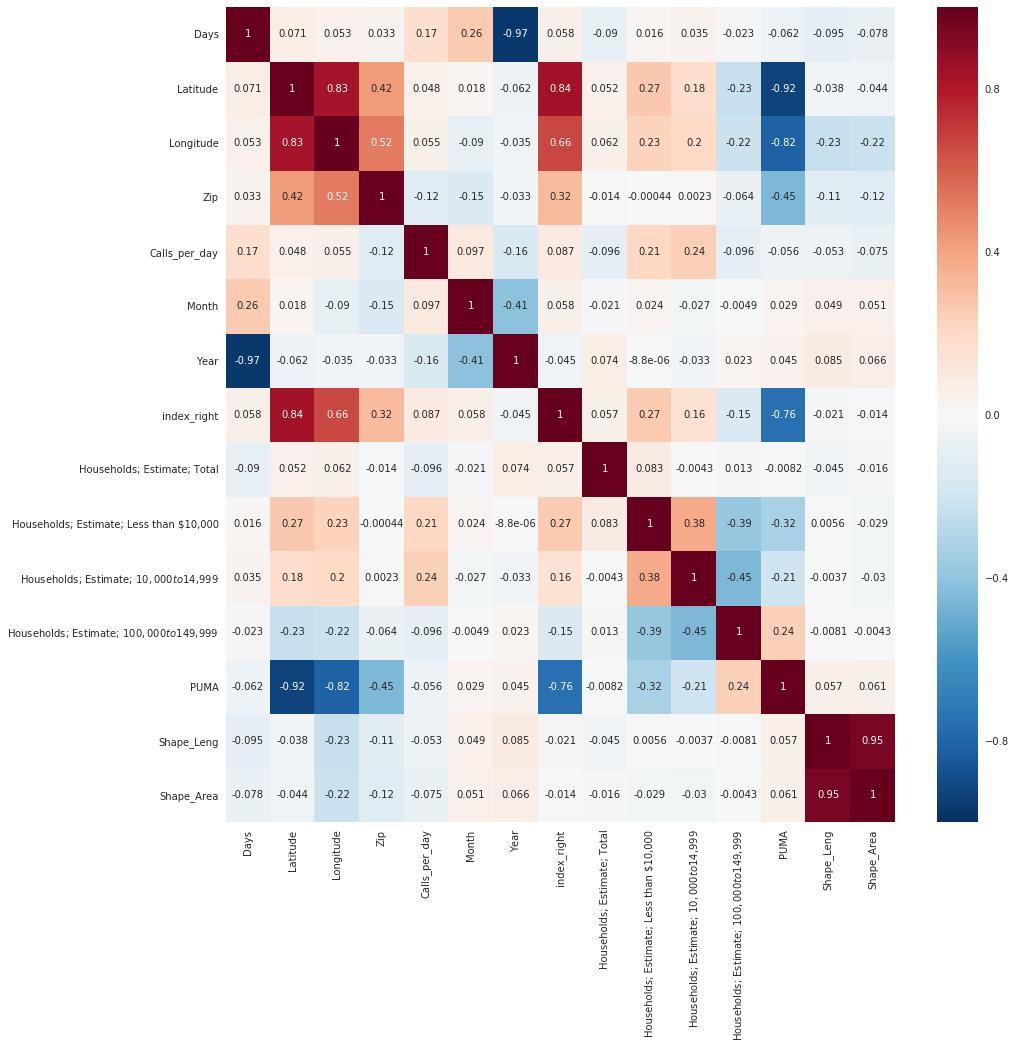

In [54]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
merged=df

In [55]:
merged['Households; Estimate; $15,000 to $24,999'] = pd.to_numeric(merged['Households; Estimate; $15,000 to $24,999'],errors='coerce') 
merged['Households; Estimate; $200,000 or more'] = pd.to_numeric(merged['Households; Estimate; $200,000 or more'],errors='coerce')
merged['Households; Estimate; $50,000 to $74,999'] = pd.to_numeric(merged['Households; Estimate; $50,000 to $74,999'],errors='coerce')
merged['Calls'] = pd.to_numeric(merged['Calls'],errors='coerce')
merged['Calls_per_day'] = pd.to_numeric(merged['Calls_per_day'],errors='coerce')


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


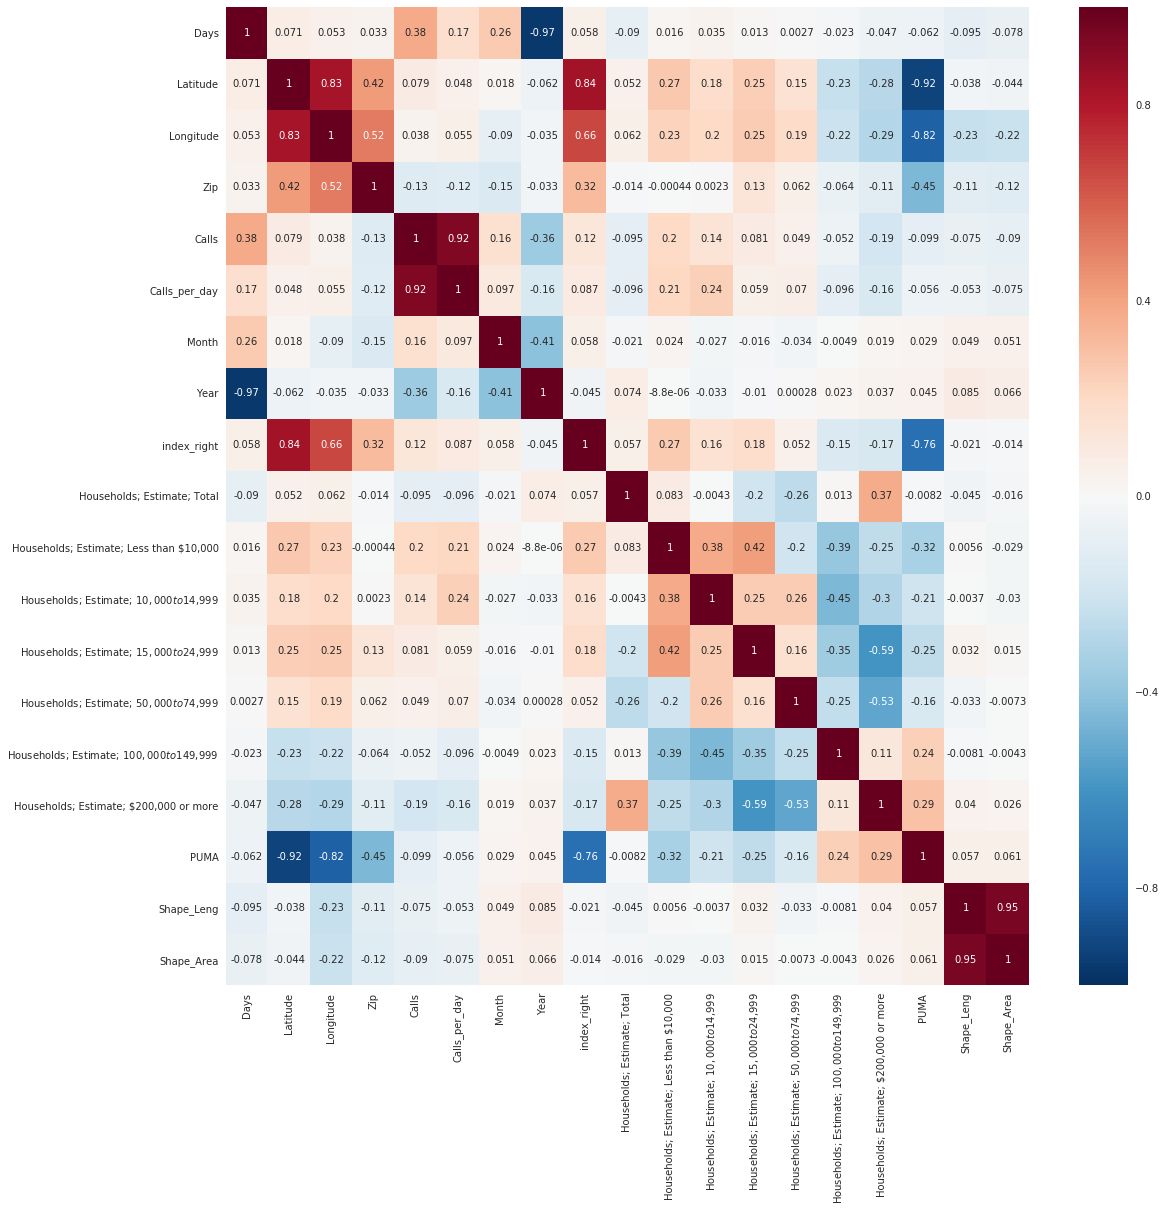

In [56]:
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)

In [57]:
df=df[df.Year==2016]
#tracts = tracts[tracts.BoroName == "Manhattan"]

In [59]:
df.shape

(831, 30)

In [67]:
df['Calls']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
14        NaN
16        NaN
17      818.0
18      785.0
19      632.0
20      201.0
21      198.0
22      138.0
23      136.0
24      119.0
28        NaN
29      818.0
30      785.0
31      632.0
32      201.0
33      198.0
34      138.0
35      136.0
36      119.0
40        NaN
        ...  
1789     35.0
1790     33.0
1791     26.0
1792     35.0
1793     33.0
1794     26.0
1795     35.0
1796     29.0
1797     28.0
1798     25.0
1799     35.0
1800     29.0
1801     28.0
1802     25.0
1803     35.0
1804     29.0
1805     28.0
1806     25.0
1807     35.0
1808     29.0
1809     28.0
1810     25.0
1829     33.0
1831     32.0
1832     29.0
1833     31.0
1834     28.0
1872     20.0
1880     17.0
1881     17.0
Name: Calls, dtype: float64